In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### data info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### data descriptive stats:

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### checking for duplicates:

In [6]:
for col in df.columns:
    print(f'the percentage of null values of {col} is {round((df[col].isnull().sum()/df.shape[0]*100),2)}%')

the percentage of null values of PassengerId is 0.0%
the percentage of null values of Survived is 0.0%
the percentage of null values of Pclass is 0.0%
the percentage of null values of Name is 0.0%
the percentage of null values of Sex is 0.0%
the percentage of null values of Age is 19.87%
the percentage of null values of SibSp is 0.0%
the percentage of null values of Parch is 0.0%
the percentage of null values of Ticket is 0.0%
the percentage of null values of Fare is 0.0%
the percentage of null values of Cabin is 77.1%
the percentage of null values of Embarked is 0.22%


<Axes: >

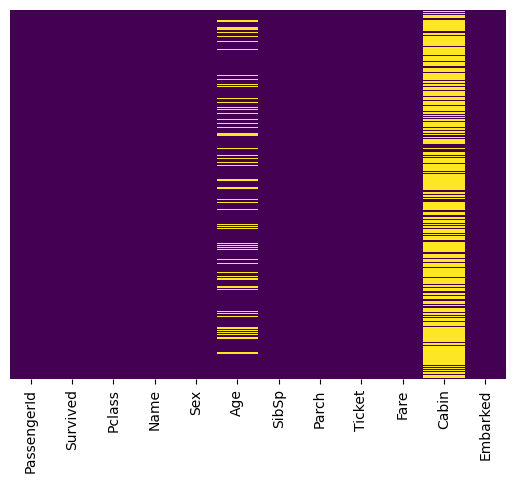

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### data visualisation:

In [8]:
def uniplot(col):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col],bins=20,kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

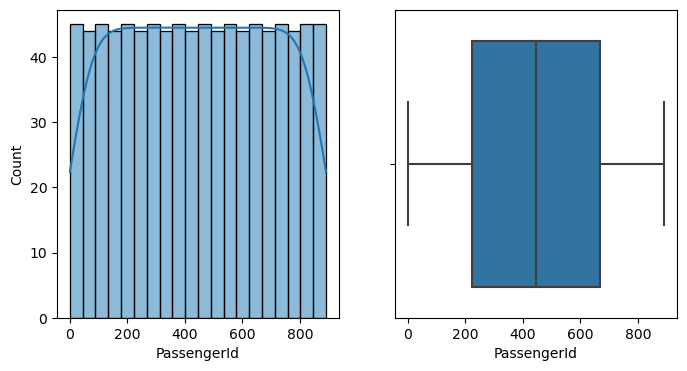

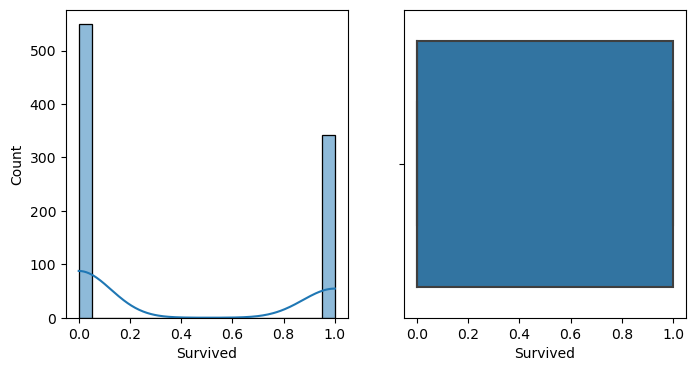

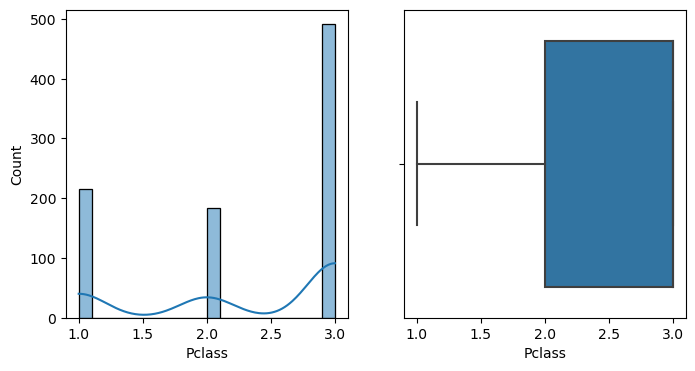

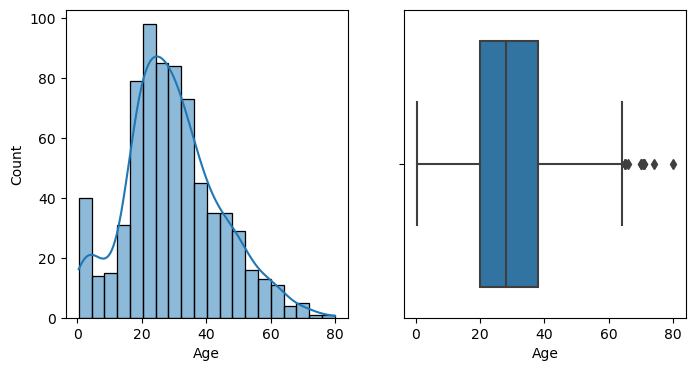

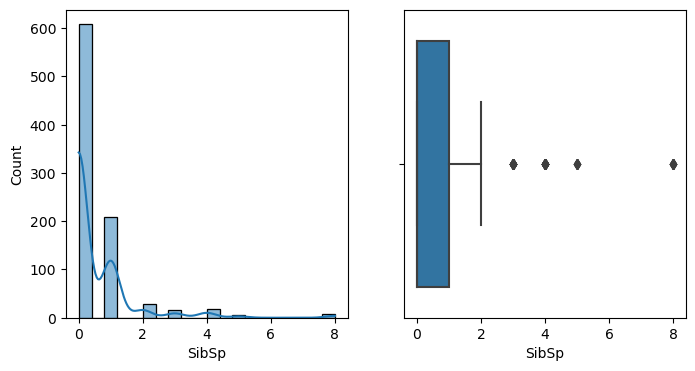

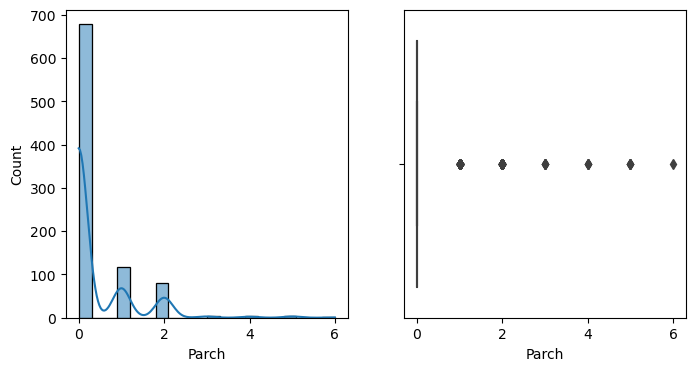

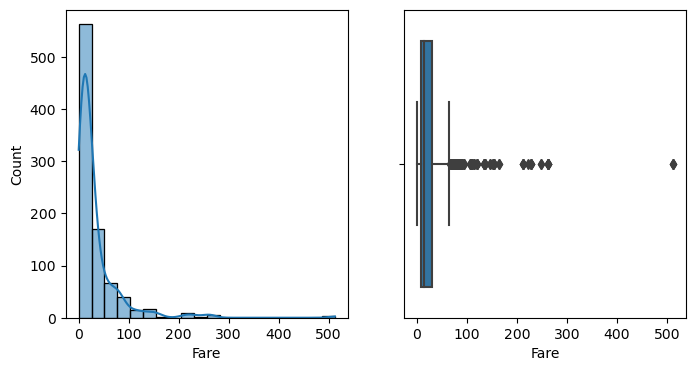

In [9]:
for col in df.select_dtypes(exclude='object'):
    uniplot(col)

<Axes: xlabel='Survived', ylabel='count'>

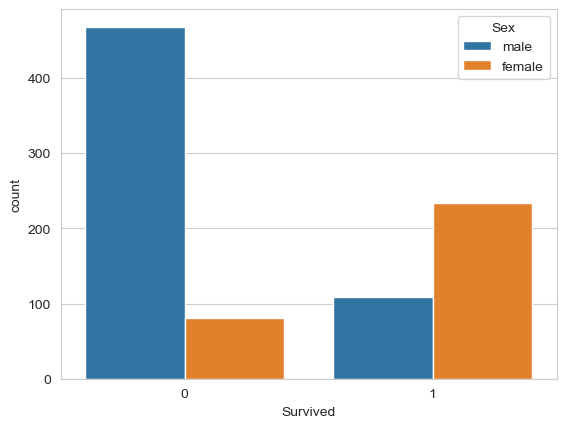

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

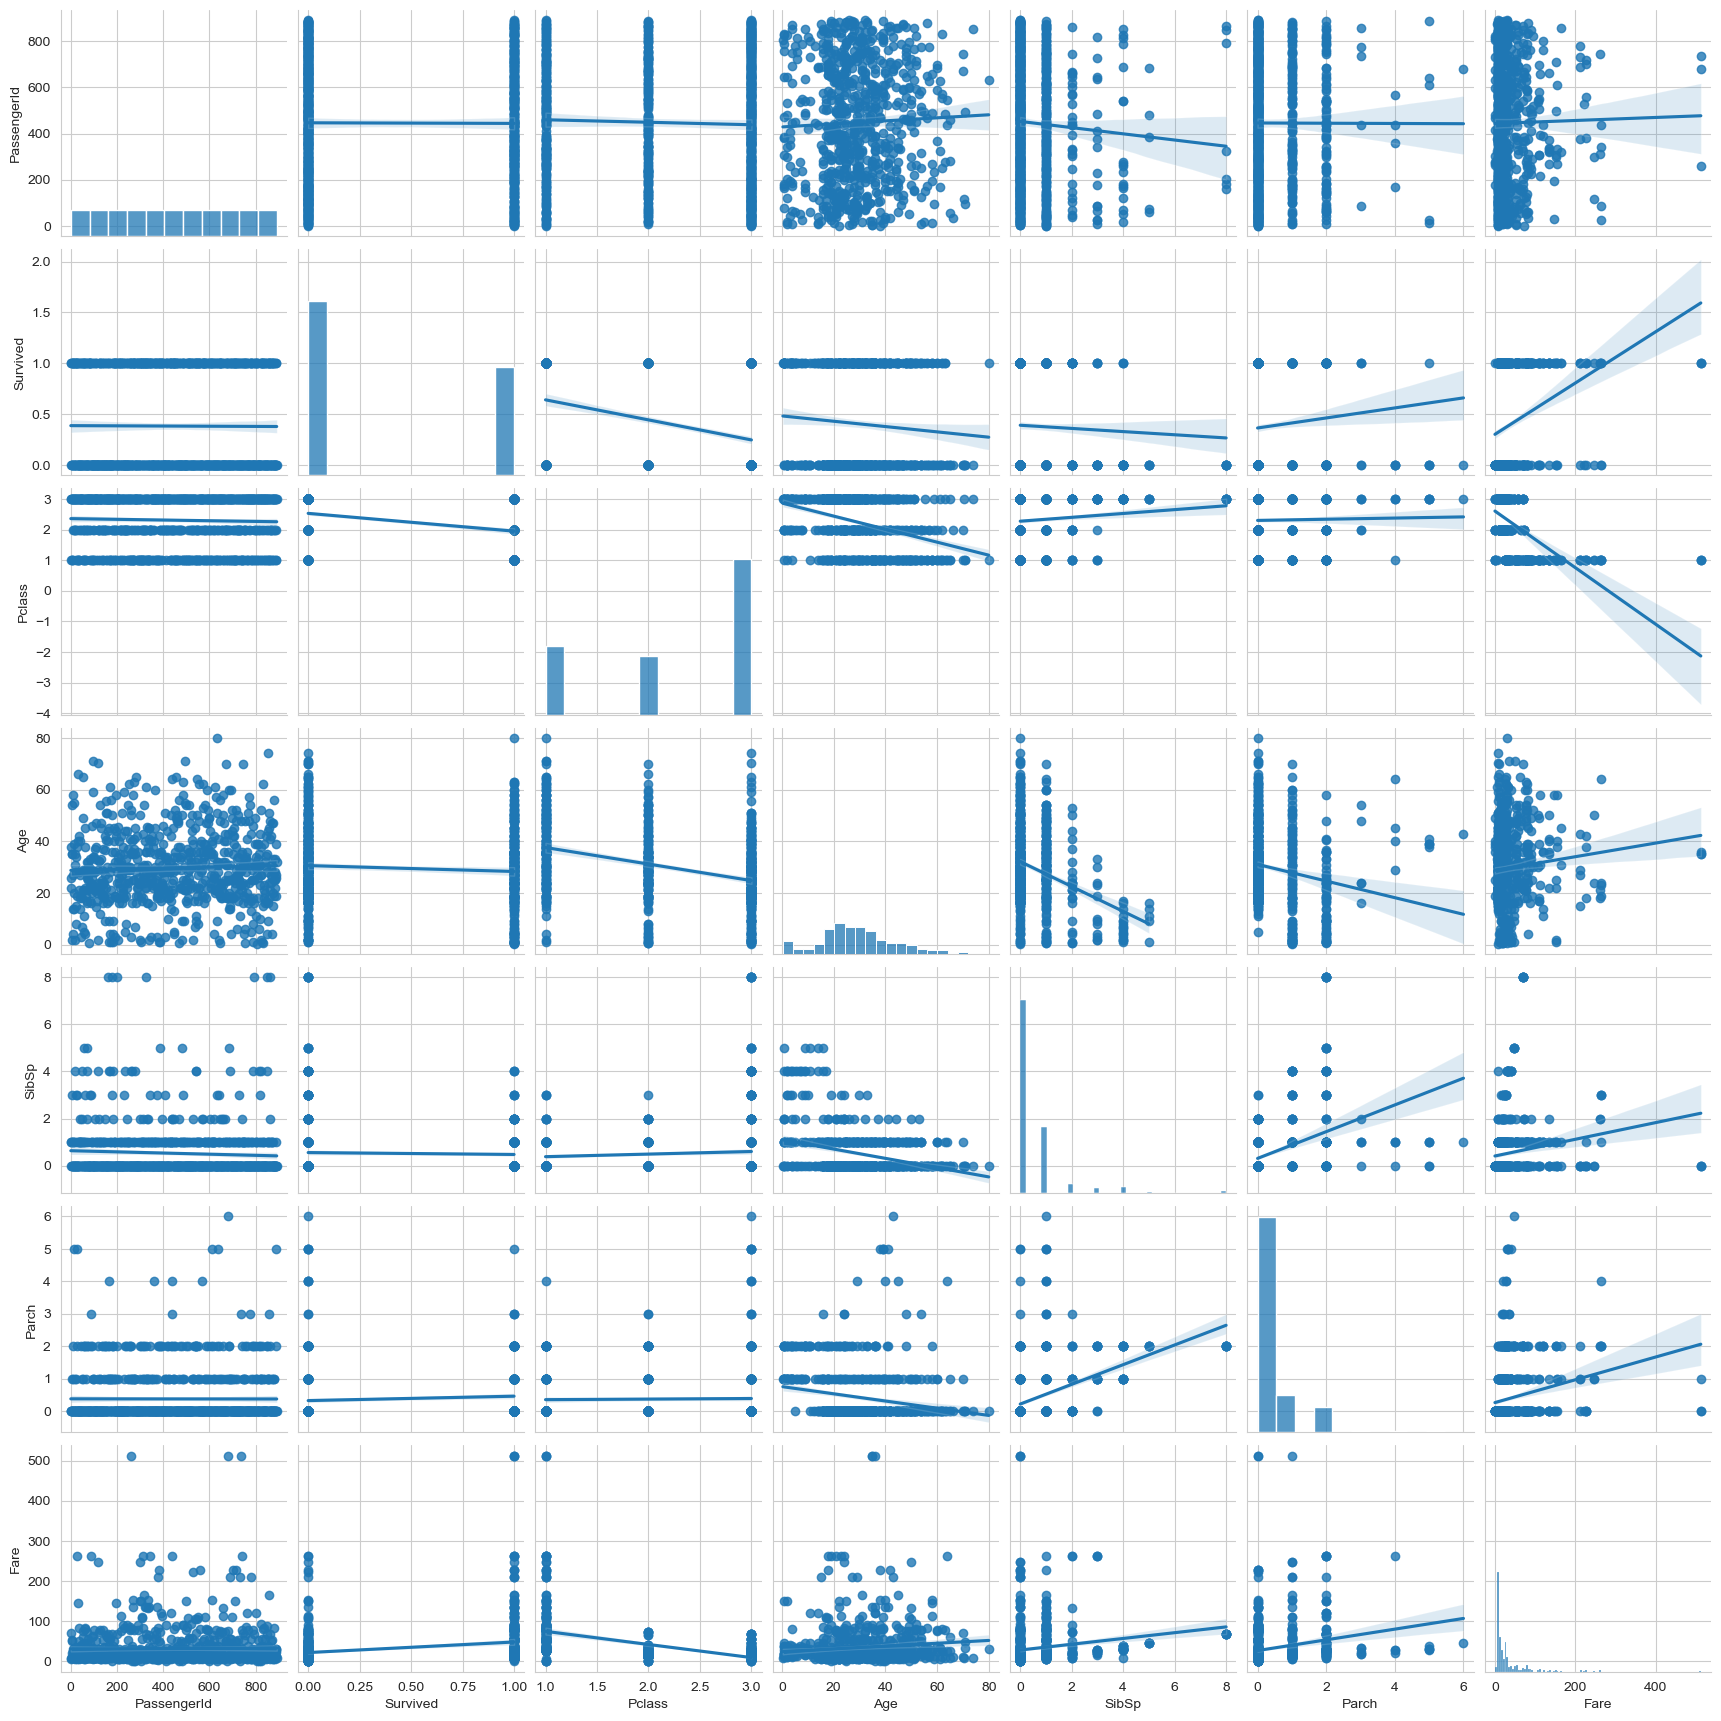

In [11]:
sns.pairplot(df,kind='reg')

C:\Users\ayush\AppData\Local\Temp\ipykernel_20916\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

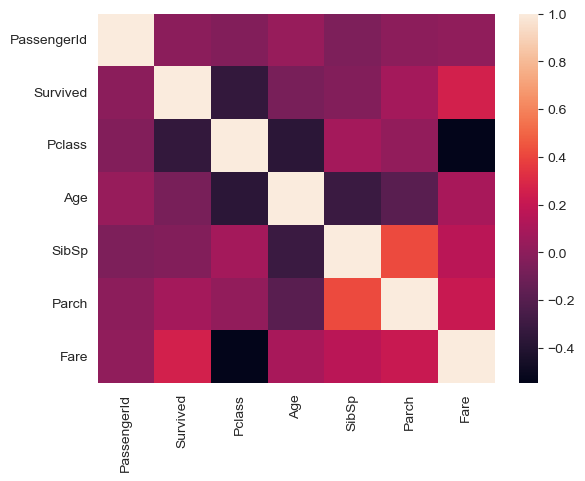

In [12]:
sns.heatmap(df.corr())

<Axes: xlabel='Survived', ylabel='count'>

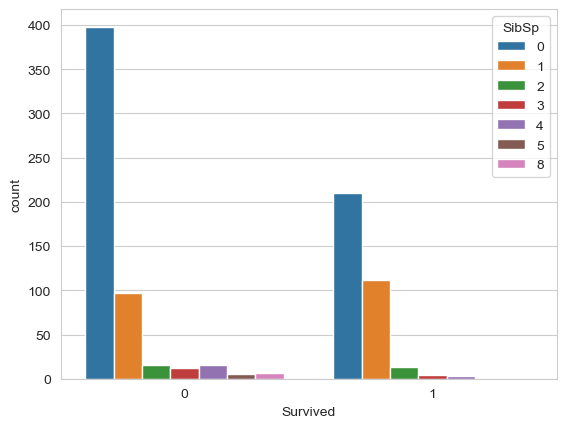

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

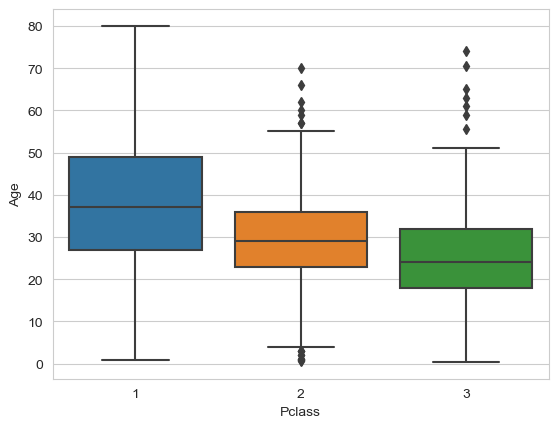

In [14]:
sns.boxplot(x='Pclass',y='Age',data=df)

### data imputation & handling null values:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
def age_rep(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
df['Age']=df[['Age','Pclass']].apply(age_rep,axis=1)

<Axes: >

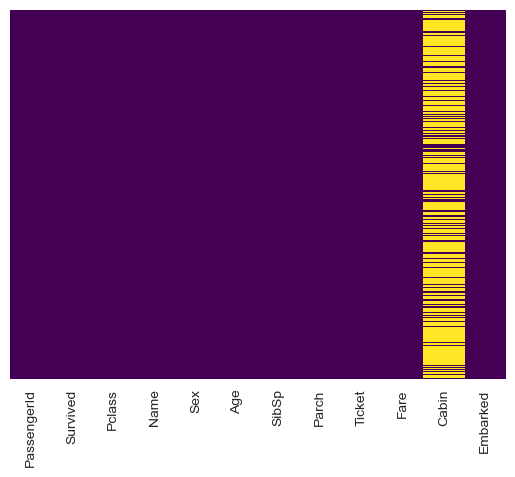

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df.drop('Cabin',axis=1,inplace=True)

<Axes: >

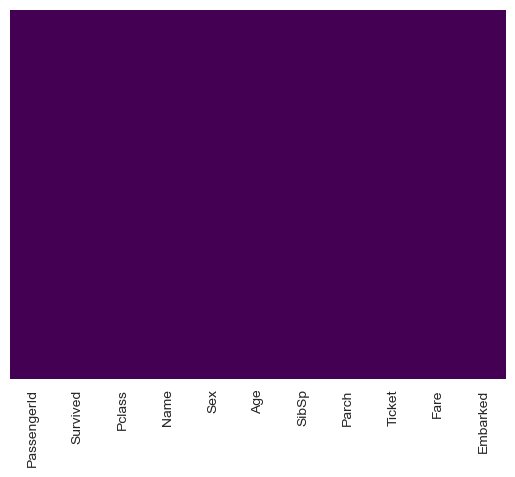

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Outliers detection & removal:

In [22]:
def outliers(col):
    q1=np.quantile(df[col],.25)
    q3=np.quantile(df[col],.75)
    iqr=q3-q1
    lr=q1-(1.5*iqr)
    ur=q3+(1.5*iqr)
    lower_per=round(df[df[col]<lr][col].count()/df.shape[0],2)
    upper_per=round(df[df[col]>ur][col].count()/df.shape[0],2)
    return print(f'the outliers percentage of {col} for lower_range is {lower_per}, for upper_range is {upper_per}')

In [23]:
for i in df.select_dtypes(exclude='object').columns:
    outliers(i)

the outliers percentage of PassengerId for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of Survived for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of Pclass for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of Age for lower_range is 0.0, for upper_range is 0.03
the outliers percentage of SibSp for lower_range is 0.0, for upper_range is 0.05
the outliers percentage of Parch for lower_range is 0.0, for upper_range is 0.24
the outliers percentage of Fare for lower_range is 0.0, for upper_range is 0.13


In [24]:
def remove_outliers(col):
    Q1=np.quantile(col,.25)
    Q3=np.quantile(col,.75)
    IQR=Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q3+(1.5*IQR)
    return lr,ur

In [25]:
lr,ur=remove_outliers(df['Age'])

In [26]:
lr

-0.5

In [27]:
ur

59.5

In [28]:
df['Age']>ur

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
def outliers_per(col):
    Q1=np.quantile(df[col],.25)
    Q3=np.quantile(df[col],.75)
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    upper_count=df[df[col]>upper_range][col].count()
    upper_percentage=upper_count/df.shape[0]*100
    lower_count=df[df[col]<lower_range][col].count()
    lower_percentage=lower_count/df.shape[0]*100
    return print(f'outlier percentage of {col} upper range is {ur}% and lower range is {lr}%')

### not removibg outliers for 'SibSp' & 'Parch'

In [30]:
exclude_columns=['SibSp','Parch']

for column in df.select_dtypes(exclude='object').columns:
    if column not in exclude_columns:
        lr,ur=remove_outliers(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

In [31]:
for i in df.select_dtypes(exclude='object').columns:
    outliers(i)

the outliers percentage of PassengerId for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of Survived for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of Pclass for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of Age for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of SibSp for lower_range is 0.0, for upper_range is 0.05
the outliers percentage of Parch for lower_range is 0.0, for upper_range is 0.24
the outliers percentage of Fare for lower_range is 0.0, for upper_range is 0.0


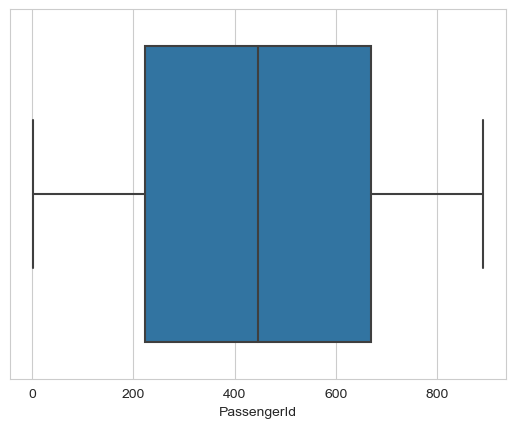

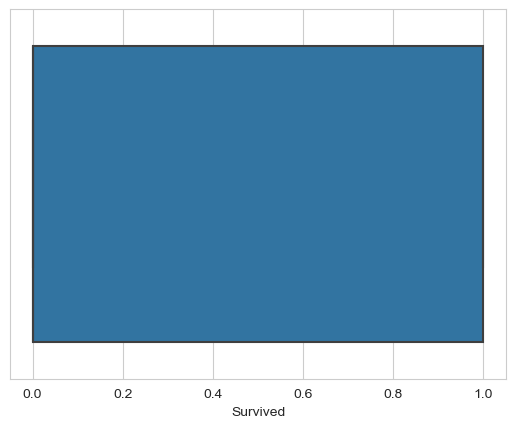

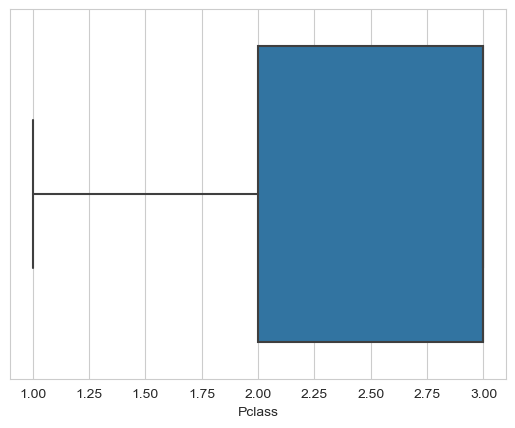

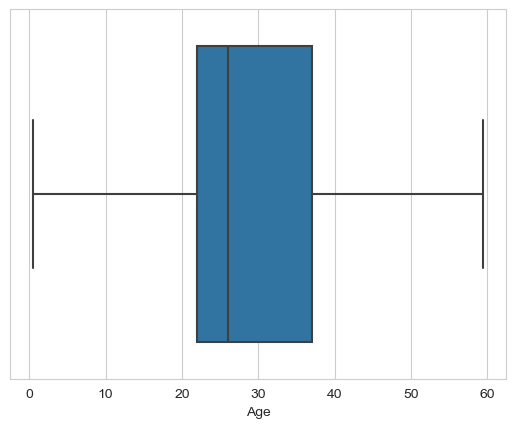

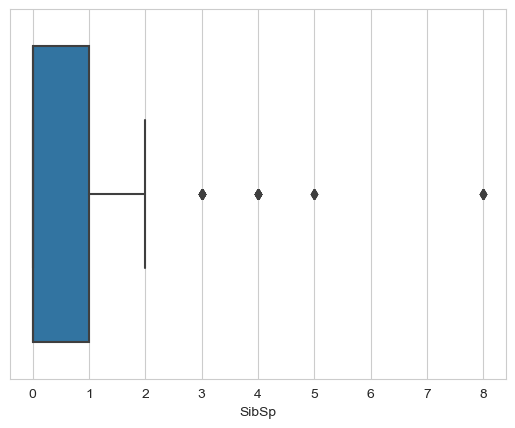

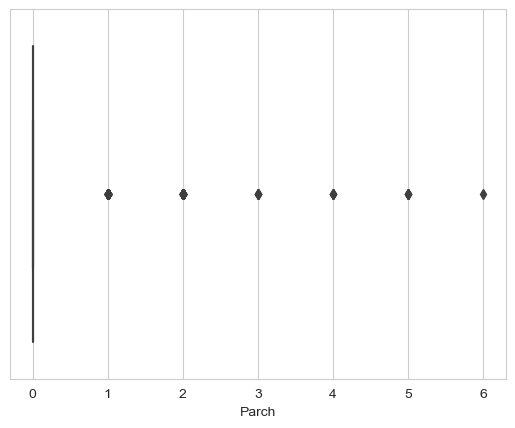

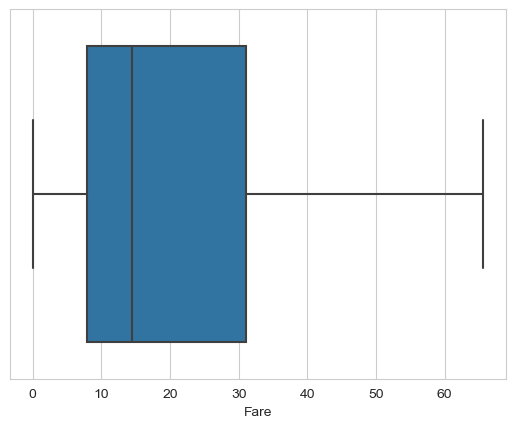

In [32]:
for col in df.select_dtypes(exclude='object').columns:
    sns.boxplot(x=df[col])
    plt.show()

### Applying One-hot encoding:

In [33]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [34]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [35]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


### dropping some columns which are not necessarily important:

In [36]:
df.drop(df[['PassengerId','Name','Sex','Ticket','Embarked']],inplace=True,axis=1)

In [37]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3.0,22.0,1,0,7.2500
1,1.0,1.0,38.0,1,0,65.6344
2,1.0,3.0,26.0,0,0,7.9250
3,1.0,1.0,35.0,1,0,53.1000
4,0.0,3.0,35.0,0,0,8.0500


In [38]:
df=pd.concat((df,sex,embarked),axis=1)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1,0,7.2500,1,0,1
1,1.0,1.0,38.0,1,0,65.6344,0,0,0
2,1.0,3.0,26.0,0,0,7.9250,0,0,1
3,1.0,1.0,35.0,1,0,53.1000,0,0,1
4,0.0,3.0,35.0,0,0,8.0500,1,0,1


### Applying Logistic Regression 

In [40]:
X=df.drop('Survived',axis=1)
y=df.pop('Survived')

In [41]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,65.6344,0,0,0
2,3.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,3.0,35.0,0,0,8.0500,1,0,1


In [42]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=15)

In [45]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
16,3.0,2.0,4,1,29.1250,1,1,0
502,3.0,24.0,0,0,7.6292,0,1,0
405,2.0,34.0,1,0,21.0000,1,0,1
339,1.0,45.0,0,0,35.5000,1,0,1
754,2.0,48.0,1,2,65.0000,0,0,1


In [46]:
y_train.head()

16     0.0
502    0.0
405    0.0
339    0.0
754    1.0
Name: Survived, dtype: float64

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr=LogisticRegression()

In [49]:
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
310,1.0,24.0,0,0,65.6344,0,0,0
635,2.0,28.0,0,0,13.0000,0,0,1
44,3.0,19.0,0,0,7.8792,0,1,0
698,1.0,49.0,1,1,65.6344,1,0,0
750,2.0,4.0,1,1,23.0000,0,0,1
...,...,...,...,...,...,...,...,...
457,1.0,38.0,1,0,51.8625,0,0,1
696,3.0,44.0,0,0,8.0500,1,0,1
218,1.0,32.0,0,0,65.6344,0,0,0
856,1.0,45.0,1,1,65.6344,0,0,1


In [51]:
lr.predict(X_test)

array([1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0.

In [52]:
lr.score(X_test,y_test)*100

78.64406779661017